## <font color=blue>Diabetes dataset age 0-30<font>
[Baseline Categorical](#SVM)

[One Hot](#hot)

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, \
f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC, SVC
from tqdm import tqdm

In [2]:
def plot_confusion(clf, title, X_test, y_test):
    svm_predicted_mc = clf.predict(X_test)
    confusion_mc = confusion_matrix(y_test, svm_predicted_mc)
    df_cm = pd.DataFrame(confusion_mc, 
                         index = [i for i in range(0,3)], columns = [i for i in range(0,3)])

    plt.figure(figsize=(6,4))
    ax_ticks= ['<30', '>30', 'NO']
    sns.heatmap(df_cm, annot=True, xticklabels=ax_ticks, yticklabels=ax_ticks, fmt='g')
    plt.title(title + '\nAccuracy:{0:.3f}'.format(accuracy_score(y_test, 
                                                                           svm_predicted_mc)))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    print('Micro-averaged precision = {:.2f} (treat instances equally)'
      .format(precision_score(y_test, svm_predicted_mc, average = 'micro')))
    print('Macro-averaged precision = {:.2f} (treat classes equally)'
      .format(precision_score(y_test, svm_predicted_mc, average = 'macro')))
    print('Micro-averaged f1 = {:.2f} (treat instances equally)'
          .format(f1_score(y_test, svm_predicted_mc, average = 'micro')))
    print('Macro-averaged f1 = {:.2f} (treat classes equally)'
          .format(f1_score(y_test, svm_predicted_mc, average = 'macro')))
    print(classification_report(y_test, svm_predicted_mc, target_names=ax_ticks))

In [3]:
# df = pd.read_csv("diabetic_data.csv", dtype='category').iloc[:500,2:]
df = pd.read_csv("diabetic_data.csv", dtype='category').iloc[:,2:]
df.shape

(101766, 48)

In [4]:
df['age'].head(2)

0     [0-10)
1    [10-20)
Name: age, dtype: category
Categories (10, object): [[0-10), [10-20), [20-30), [30-40), ..., [60-70), [70-80), [80-90), [90-100)]

In [5]:
df = df.loc[(df['age'] == '[0-10)')| (df['age'] == '[20-30)') | (df['age'] == '[10-20)')]
# df = df.loc[(df['age'] == '[0-10)')| (df['age'] == '[20-30)')]

In [6]:
df.head(2)

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),?,1,1,7,3,?,?,...,No,Up,No,No,No,No,No,Ch,Yes,>30


In [7]:
df.describe()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,2509,2509,2509,2509,2509,2509,2509,2509,2509,2509,...,2509,2509,2509,2509,2509,2509,2509,2509,2509,2509
unique,6,2,3,8,8,18,11,14,14,47,...,1,4,1,1,1,1,1,2,2,3
top,Caucasian,Female,[20-30),?,1,1,7,2,?,?,...,No,Steady,No,No,No,No,No,No,Yes,NO
freq,1549,1599,1657,2417,1488,2175,1521,681,1222,998,...,2509,912,2509,2509,2509,2509,2509,1350,2048,1470


In [8]:
def show_unique(dataF):
    for c in dataF.columns:
        print(c, dataF[c].unique())
        print('*'*50)

show_unique(df)

race [Caucasian, AfricanAmerican, Other, Hispanic, ?, Asian]
Categories (6, object): [Caucasian, AfricanAmerican, Other, Hispanic, ?, Asian]
**************************************************
gender [Female, Male]
Categories (2, object): [Female, Male]
**************************************************
age [[0-10), [10-20), [20-30)]
Categories (3, object): [[0-10), [10-20), [20-30)]
**************************************************
weight [?, [0-25), [25-50), [50-75), [100-125), [75-100), [125-150), [150-175)]
Categories (8, object): [?, [0-25), [25-50), [50-75), [100-125), [75-100), [125-150), [150-175)]
**************************************************
admission_type_id [6, 1, 2, 3, 5, 8, 4, 7]
Categories (8, object): [6, 1, 2, 3, 5, 8, 4, 7]
**************************************************
discharge_disposition_id [25, 1, 5, 6, 11, ..., 4, 23, 28, 13, 9]
Length: 18
Categories (18, object): [25, 1, 5, 6, ..., 23, 28, 13, 9]
**************************************************
admis

### <font color =blue>1. remove columns with missing data</font>

In [9]:
df = df.drop(columns=['weight', 'payer_code', 'medical_specialty'])
df.head(2)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,...,No,Up,No,No,No,No,No,Ch,Yes,>30


### <font color=blue> 2. remove incomplete columns and rows </font>

In [10]:
# drop missing values
df = df.replace('?', np.nan)
df = df.replace('Unknown/Invalid', np.nan)
df = df.dropna()
df.shape

(2009, 45)

In [11]:
df = df.drop(columns= df.columns[df.nunique() == 1])

In [12]:
show_unique(df)

race [Caucasian, AfricanAmerican, Other, Hispanic, Asian]
Categories (5, object): [Caucasian, AfricanAmerican, Other, Hispanic, Asian]
**************************************************
gender [Female, Male]
Categories (2, object): [Female, Male]
**************************************************
age [[10-20), [20-30), [0-10)]
Categories (3, object): [[10-20), [20-30), [0-10)]
**************************************************
admission_type_id [1, 2, 6, 3, 5, 8, 4, 7]
Categories (8, object): [1, 2, 6, 3, 5, 8, 4, 7]
**************************************************
discharge_disposition_id [1, 25, 6, 11, 7, ..., 4, 23, 28, 13, 9]
Length: 18
Categories (18, object): [1, 25, 6, 11, ..., 23, 28, 13, 9]
**************************************************
admission_source_id [7, 2, 1, 6, 20, ..., 4, 3, 9, 5, 11]
Length: 11
Categories (11, object): [7, 2, 1, 6, ..., 3, 9, 5, 11]
**************************************************
time_in_hospital [3, 2, 10, 1, 5, ..., 11, 9, 8, 12, 14]
Lengt

### <font color = blue>3. categorical variables</font>

In [13]:
to_num = ['time_in_hospital', 'num_lab_procedures', 'num_procedures',
         'num_medications', 'number_outpatient', 'number_emergency',
         'number_inpatient', 'number_diagnoses']

to_cat_codes = list(set(df.columns) - set(to_num))

In [14]:
X_features = list(to_num)
for c in to_cat_codes:
    df[c+'_cat'] = df[c].cat.codes        
    X_features += [c+'_cat']
    
X_features.remove('readmitted_cat')
X_features

['time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses',
 'glimepiride_cat',
 'repaglinide_cat',
 'pioglitazone_cat',
 'diag_2_cat',
 'admission_source_id_cat',
 'race_cat',
 'glyburide_cat',
 'insulin_cat',
 'nateglinide_cat',
 'discharge_disposition_id_cat',
 'A1Cresult_cat',
 'age_cat',
 'glipizide_cat',
 'diag_1_cat',
 'acarbose_cat',
 'admission_type_id_cat',
 'change_cat',
 'metformin_cat',
 'diag_3_cat',
 'diabetesMed_cat',
 'gender_cat',
 'max_glu_serum_cat',
 'rosiglitazone_cat']

In [15]:
df['readmitted'].head(11)

1      >30
2       NO
28     >30
128    >30
143    >30
191     NO
199    >30
204     NO
232    <30
258     NO
270     NO
Name: readmitted, dtype: category
Categories (3, object): [<30, >30, NO]

In [16]:
df['readmitted_cat'].head(11)

1      1
2      2
28     1
128    1
143    1
191    2
199    1
204    2
232    0
258    2
270    2
Name: readmitted_cat, dtype: int8

#### <font color=red>Target Mapping: < 30 = 0, >30 = 1, NO = 2, </font>

### <font color=blue>4. split</font>

In [17]:
for n in to_num:
    df[n] = df[n].astype('int')

df[to_num].dtypes

time_in_hospital      int64
num_lab_procedures    int64
num_procedures        int64
num_medications       int64
number_outpatient     int64
number_emergency      int64
number_inpatient      int64
number_diagnoses      int64
dtype: object

## <font color=green>to Categorical</font>

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    df[X_features], df['readmitted_cat'] , random_state = 0)

In [19]:
X_train.head(2)

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,glimepiride_cat,repaglinide_cat,...,diag_1_cat,acarbose_cat,admission_type_id_cat,change_cat,metformin_cat,diag_3_cat,diabetesMed_cat,gender_cat,max_glu_serum_cat,rosiglitazone_cat
56340,7,83,6,33,0,0,0,9,1,1,...,190,0,0,0,1,550,1,0,2,1
88061,11,68,2,12,0,0,1,5,1,1,...,73,0,0,0,1,536,1,1,2,1


In [20]:
y_train.head(2)

56340    2
88061    1
Name: readmitted_cat, dtype: int8

In [21]:
X_test.head(2)

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,glimepiride_cat,repaglinide_cat,...,diag_1_cat,acarbose_cat,admission_type_id_cat,change_cat,metformin_cat,diag_3_cat,diabetesMed_cat,gender_cat,max_glu_serum_cat,rosiglitazone_cat
95141,4,66,0,14,0,0,0,5,1,1,...,308,0,0,0,1,92,1,0,2,1
6136,2,47,1,11,0,0,0,9,1,1,...,347,0,1,1,1,47,0,0,2,1


In [22]:
y_test.head(2)

95141    2
6136     2
Name: readmitted_cat, dtype: int8

### <font color=green>min max scaling</font>

In [23]:
X_train.dtypes

time_in_hospital                int64
num_lab_procedures              int64
num_procedures                  int64
num_medications                 int64
number_outpatient               int64
number_emergency                int64
number_inpatient                int64
number_diagnoses                int64
glimepiride_cat                  int8
repaglinide_cat                  int8
pioglitazone_cat                 int8
diag_2_cat                      int16
admission_source_id_cat          int8
race_cat                         int8
glyburide_cat                    int8
insulin_cat                      int8
nateglinide_cat                  int8
discharge_disposition_id_cat     int8
A1Cresult_cat                    int8
age_cat                          int8
glipizide_cat                    int8
diag_1_cat                      int16
acarbose_cat                     int8
admission_type_id_cat            int8
change_cat                       int8
metformin_cat                    int8
diag_3_cat  

### <font color=green>before scale</font>

In [24]:
X_train.describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,glimepiride_cat,repaglinide_cat,...,diag_1_cat,acarbose_cat,admission_type_id_cat,change_cat,metformin_cat,diag_3_cat,diabetesMed_cat,gender_cat,max_glu_serum_cat,rosiglitazone_cat
count,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,...,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000
mean,3.661355,43.843293,0.725764,11.687251,0.343958,0.502656,1.191235,5.966135,1.008632,1.004648,...,204.867862,0.000664,0.847278,0.511952,1.098938,227.181275,0.804781,0.347278,1.974768,1.019920
std,2.658315,20.649472,1.178360,6.807934,1.201834,1.362158,2.652263,2.109821,0.099460,0.085366,...,144.058148,0.025768,1.333662,0.500023,0.334364,170.558947,0.396501,0.476263,0.214183,0.148977
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,31.000000,0.000000,7.000000,0.000000,0.000000,0.000000,4.000000,1.000000,1.000000,...,73.000000,0.000000,0.000000,0.000000,1.000000,90.000000,1.000000,0.000000,2.000000,1.000000
50%,3.000000,46.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,1.000000,1.000000,...,126.000000,0.000000,0.000000,1.000000,1.000000,172.000000,1.000000,0.000000,2.000000,1.000000
75%,4.000000,59.000000,1.000000,15.000000,0.000000,0.000000,1.000000,8.000000,1.000000,1.000000,...,350.000000,0.000000,1.000000,1.000000,1.000000,340.000000,1.000000,1.000000,2.000000,1.000000
max,14.000000,132.000000,6.000000,65.000000,15.000000,13.000000,21.000000,14.000000,2.000000,3.000000,...,688.000000,1.000000,7.000000,1.000000,3.000000,771.000000,1.000000,1.000000,3.000000,3.000000


In [25]:
X_test.describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,glimepiride_cat,repaglinide_cat,...,diag_1_cat,acarbose_cat,admission_type_id_cat,change_cat,metformin_cat,diag_3_cat,diabetesMed_cat,gender_cat,max_glu_serum_cat,rosiglitazone_cat
count,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.0,...,503.000000,503.0,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000
mean,3.572565,42.596421,0.691849,11.101392,0.320080,0.491054,1.109344,5.793241,1.015905,1.0,...,205.194831,0.0,0.882704,0.526839,1.095427,221.882704,0.783300,0.359841,1.966203,1.011928
std,2.715274,21.021952,1.221680,6.929616,1.051907,1.305604,2.525167,2.041647,0.125231,0.0,...,148.481590,0.0,1.324064,0.499776,0.320046,166.001956,0.412407,0.480431,0.229435,0.125673
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.0,...,66.000000,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,28.000000,0.000000,6.000000,0.000000,0.000000,0.000000,4.000000,1.000000,1.0,...,73.000000,0.0,0.000000,0.000000,1.000000,90.000000,1.000000,0.000000,2.000000,1.000000
50%,3.000000,44.000000,0.000000,10.000000,0.000000,0.000000,0.000000,5.000000,1.000000,1.0,...,125.000000,0.0,0.000000,1.000000,1.000000,172.000000,1.000000,0.000000,2.000000,1.000000
75%,4.000000,58.000000,1.000000,15.000000,0.000000,0.000000,1.000000,7.000000,1.000000,1.0,...,350.000000,0.0,2.000000,1.000000,1.000000,330.000000,1.000000,1.000000,2.000000,1.000000
max,14.000000,101.000000,6.000000,44.000000,9.000000,8.000000,16.000000,9.000000,2.000000,1.0,...,707.000000,0.0,6.000000,1.000000,3.000000,766.000000,1.000000,1.000000,3.000000,2.000000


In [26]:
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_features)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_features)

### <font color=green>after scale</font>

In [27]:
X_train.iloc[:,:20].describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,glimepiride_cat,repaglinide_cat,pioglitazone_cat,diag_2_cat,admission_source_id_cat,race_cat,glyburide_cat,insulin_cat,nateglinide_cat,discharge_disposition_id_cat,A1Cresult_cat,age_cat
count,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000
mean,0.204720,0.327048,0.120961,0.166988,0.022931,0.038666,0.056725,0.269649,0.504316,0.002324,0.339309,0.242553,0.379008,0.351428,0.011288,0.515715,0.000664,0.076721,0.597167,0.852258
std,0.204486,0.157630,0.196393,0.106374,0.080122,0.104781,0.126298,0.191802,0.049730,0.042683,0.047465,0.190469,0.261581,0.262646,0.082760,0.349777,0.025768,0.204161,0.192232,0.263351
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.076923,0.229008,0.000000,0.093750,0.000000,0.000000,0.000000,0.090909,0.500000,0.000000,0.333333,0.114130,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.333333,0.500000
50%,0.153846,0.343511,0.000000,0.140625,0.000000,0.000000,0.000000,0.272727,0.500000,0.000000,0.333333,0.141304,0.571429,0.500000,0.000000,0.666667,0.000000,0.000000,0.666667,1.000000
75%,0.230769,0.442748,0.166667,0.218750,0.000000,0.000000,0.047619,0.454545,0.500000,0.000000,0.333333,0.394022,0.571429,0.500000,0.000000,0.666667,0.000000,0.000000,0.666667,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
X_train.iloc[:,21:40].describe()

,diag_1_cat,acarbose_cat,admission_type_id_cat,change_cat,metformin_cat,diag_3_cat,diabetesMed_cat,gender_cat,max_glu_serum_cat,rosiglitazone_cat
count,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000
mean,0.296751,0.000664,0.121040,0.511952,0.366313,0.293742,0.804781,0.347278,0.658256,0.009960
std,0.209692,0.025768,0.190523,0.500023,0.111455,0.221505,0.396501,0.476263,0.071394,0.074489
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.104803,0.000000,0.000000,0.000000,0.333333,0.115584,1.000000,0.000000,0.666667,0.000000
50%,0.181951,0.000000,0.000000,1.000000,0.333333,0.222078,1.000000,0.000000,0.666667,0.000000
75%,0.508006,0.000000,0.142857,1.000000,0.333333,0.440260,1.000000,1.000000,0.666667,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
y_train.describe()

count    1506.000000
mean        1.442231
std         0.696204
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: readmitted_cat, dtype: float64

In [30]:
X_test.shape

(503, 31)

In [31]:
X_test.iloc[:,:20].describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,glimepiride_cat,repaglinide_cat,pioglitazone_cat,diag_2_cat,admission_source_id_cat,race_cat,glyburide_cat,insulin_cat,nateglinide_cat,discharge_disposition_id_cat,A1Cresult_cat,age_cat
count,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.0,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000
mean,0.197890,0.317530,0.115308,0.157834,0.021339,0.037773,0.052826,0.253931,0.507952,0.0,0.335984,0.237693,0.362823,0.363320,0.006958,0.530152,0.001988,0.087641,0.604374,0.849901
std,0.208867,0.160473,0.203613,0.108275,0.070127,0.100431,0.120246,0.185604,0.062615,0.0,0.029636,0.182257,0.265828,0.247158,0.058631,0.347518,0.044588,0.220986,0.188441,0.256072
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.0,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.076923,0.206107,0.000000,0.078125,0.000000,0.000000,0.000000,0.090909,0.500000,0.0,0.333333,0.119565,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.666667,0.500000
50%,0.153846,0.328244,0.000000,0.140625,0.000000,0.000000,0.000000,0.181818,0.500000,0.0,0.333333,0.120924,0.571429,0.500000,0.000000,0.666667,0.000000,0.000000,0.666667,1.000000
75%,0.230769,0.435115,0.166667,0.218750,0.000000,0.000000,0.047619,0.363636,0.500000,0.0,0.333333,0.387228,0.571429,0.500000,0.000000,0.666667,0.000000,0.000000,0.666667,1.000000
max,1.000000,0.763359,1.000000,0.671875,0.600000,0.615385,0.761905,0.545455,1.000000,0.0,0.666667,0.949728,0.571429,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
X_test.iloc[:,21:40].describe()

,diag_1_cat,acarbose_cat,admission_type_id_cat,change_cat,metformin_cat,diag_3_cat,diabetesMed_cat,gender_cat,max_glu_serum_cat,rosiglitazone_cat
count,503.000000,503.0,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000
mean,0.297227,0.0,0.126101,0.526839,0.365142,0.286861,0.783300,0.359841,0.655401,0.005964
std,0.216130,0.0,0.189152,0.499776,0.106682,0.215587,0.412407,0.480431,0.076478,0.062836
min,0.094614,0.0,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,-0.500000
25%,0.104803,0.0,0.000000,0.000000,0.333333,0.115584,1.000000,0.000000,0.666667,0.000000
50%,0.180495,0.0,0.000000,1.000000,0.333333,0.222078,1.000000,0.000000,0.666667,0.000000
75%,0.508006,0.0,0.285714,1.000000,0.333333,0.427273,1.000000,1.000000,0.666667,0.000000
max,1.027656,0.0,0.857143,1.000000,1.000000,0.993506,1.000000,1.000000,1.000000,0.500000


In [33]:
y_test.describe()

count    503.000000
mean       1.429423
std        0.713060
min        0.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        2.000000
Name: readmitted_cat, dtype: float64

<a id='SVM'></a>

### <font color=green> Baseline Categorical</font>

In [34]:
%%time
from sklearn.dummy import DummyClassifier

d_major = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)

print('train accuracy: {:.2f}'.format(d_major.score(X_train, y_train)))
print('test accuracy: {:.2f}'.format(d_major.score(X_test, y_test)))

train accuracy: 0.56
test accuracy: 0.56
CPU times: user 2.02 ms, sys: 0 ns, total: 2.02 ms
Wall time: 1.72 ms


<IPython.core.display.Javascript object>


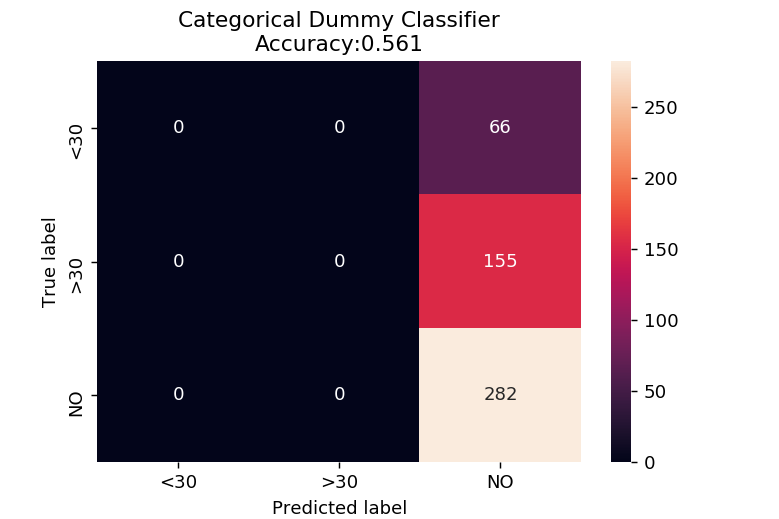

Micro-averaged precision = 0.56 (treat instances equally)
Macro-averaged precision = 0.19 (treat classes equally)
Micro-averaged f1 = 0.56 (treat instances equally)
Macro-averaged f1 = 0.24 (treat classes equally)
             precision    recall  f1-score   support

        <30       0.00      0.00      0.00        66
        >30       0.00      0.00      0.00       155
         NO       0.56      1.00      0.72       282

avg / total       0.31      0.56      0.40       503



/home/lam/anaconda2/envs/my_env3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lam/anaconda2/envs/my_env3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lam/anaconda2/envs/my_env3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [35]:
plot_confusion(d_major, 'Categorical Dummy Classifier', X_test, y_test)

[LibLinear]training accuracy: 0.63
test accuracy: 0.63


<IPython.core.display.Javascript object>


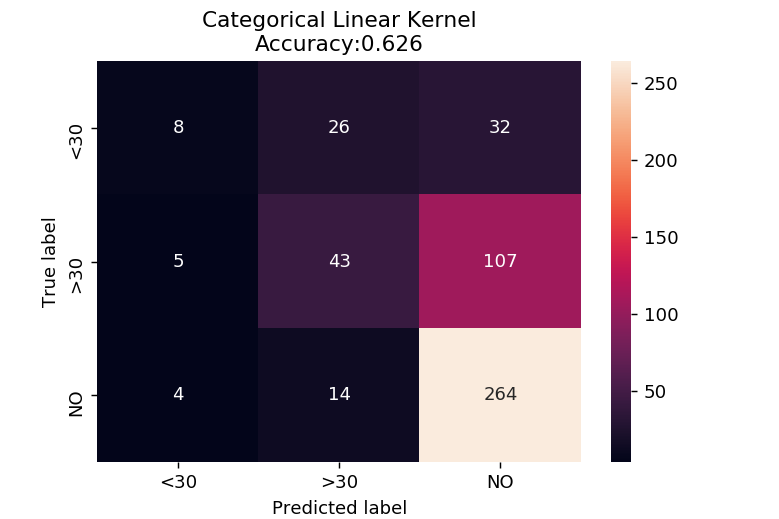

Micro-averaged precision = 0.63 (treat instances equally)
Macro-averaged precision = 0.55 (treat classes equally)
Micro-averaged f1 = 0.63 (treat instances equally)
Macro-averaged f1 = 0.44 (treat classes equally)
             precision    recall  f1-score   support

        <30       0.47      0.12      0.19        66
        >30       0.52      0.28      0.36       155
         NO       0.66      0.94      0.77       282

avg / total       0.59      0.63      0.57       503

CPU times: user 292 ms, sys: 23.2 ms, total: 316 ms
Wall time: 129 ms


In [36]:
%%time
clf = LinearSVC(verbose=True).fit(X_train, y_train)

print('training accuracy: {:.2f}'.format(clf.score(X_train, y_train)))
print('test accuracy: {:.2f}'.format(clf.score(X_test, y_test)))
plot_confusion(clf, 'Categorical Linear Kernel', X_test, y_test)

### <font color=green>SVM optimise over accuracy</font>

In [37]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

clf = SVC() 

grid_values = [
  {'C': [0.1, 1, 10, 100, 1000], 'kernel':['linear', 'sigmoid']}, 
    {'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.001, 0.01, 0.05, 0.1, 1, 10, 100], 'kernel':['rbf']},
    {'C': [0.1, 1, 10, 100, 1000], 'degree':[2, 3, 4, 5], 'kernel': ['poly']}
 ]

grid_clf_acc = GridSearchCV(clf, param_grid = grid_values, n_jobs= 4)
grid_clf_acc.fit(X_train, y_train)
y_decision_fn_scores_acc = grid_clf_acc.decision_function(X_test) 

print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)

Grid best parameter (max. accuracy):  {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
Grid best score (accuracy):  0.6374501992031872
CPU times: user 807 ms, sys: 46 ms, total: 853 ms
Wall time: 10.9 s


In [38]:
pd.DataFrame(grid_clf_acc.cv_results_).sort_values(by=['mean_test_score'], ascending=False).iloc[:,2:8]

/home/lam/anaconda2/envs/my_env3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/lam/anaconda2/envs/my_env3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/lam/anaconda2/envs/my_env3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/ho

,mean_test_score,mean_train_score,param_C,param_degree,param_gamma,param_kernel
39,0.637450,0.678942,1000,NaN,0.01,rbf
8,0.636122,0.641097,1000,NaN,NaN,linear
4,0.635458,0.637777,10,NaN,NaN,linear
6,0.634794,0.641430,100,NaN,NaN,linear
32,0.631474,0.636111,100,NaN,0.01,rbf
33,0.630146,0.706496,100,NaN,0.05,rbf
38,0.625498,0.630469,1000,NaN,0.001,rbf
27,0.623506,0.676944,10,NaN,0.1,rbf
62,0.620850,0.703513,1000,3,NaN,poly
57,0.620850,0.655041,100,2,NaN,poly


<IPython.core.display.Javascript object>


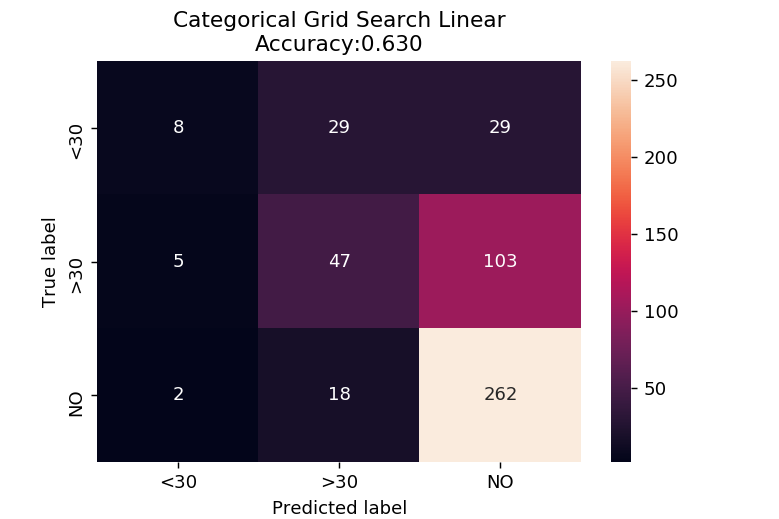

Micro-averaged precision = 0.63 (treat instances equally)
Macro-averaged precision = 0.57 (treat classes equally)
Micro-averaged f1 = 0.63 (treat instances equally)
Macro-averaged f1 = 0.45 (treat classes equally)
             precision    recall  f1-score   support

        <30       0.53      0.12      0.20        66
        >30       0.50      0.30      0.38       155
         NO       0.66      0.93      0.78       282

avg / total       0.60      0.63      0.58       503



In [39]:
plot_confusion(grid_clf_acc, 'Categorical Grid Search Linear', X_test,y_test)

In [40]:
# precision recall curve only for binary class

<a id='hot'></a>

## <font color=Orange>One Hot</font>

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    df[X_features], df['readmitted_cat'] , random_state = 0)

In [42]:
X_train.dtypes

time_in_hospital                int64
num_lab_procedures              int64
num_procedures                  int64
num_medications                 int64
number_outpatient               int64
number_emergency                int64
number_inpatient                int64
number_diagnoses                int64
glimepiride_cat                  int8
repaglinide_cat                  int8
pioglitazone_cat                 int8
diag_2_cat                      int16
admission_source_id_cat          int8
race_cat                         int8
glyburide_cat                    int8
insulin_cat                      int8
nateglinide_cat                  int8
discharge_disposition_id_cat     int8
A1Cresult_cat                    int8
age_cat                          int8
glipizide_cat                    int8
diag_1_cat                      int16
acarbose_cat                     int8
admission_type_id_cat            int8
change_cat                       int8
metformin_cat                    int8
diag_3_cat  

In [43]:
X_train.describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,glimepiride_cat,repaglinide_cat,...,diag_1_cat,acarbose_cat,admission_type_id_cat,change_cat,metformin_cat,diag_3_cat,diabetesMed_cat,gender_cat,max_glu_serum_cat,rosiglitazone_cat
count,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,...,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000
mean,3.661355,43.843293,0.725764,11.687251,0.343958,0.502656,1.191235,5.966135,1.008632,1.004648,...,204.867862,0.000664,0.847278,0.511952,1.098938,227.181275,0.804781,0.347278,1.974768,1.019920
std,2.658315,20.649472,1.178360,6.807934,1.201834,1.362158,2.652263,2.109821,0.099460,0.085366,...,144.058148,0.025768,1.333662,0.500023,0.334364,170.558947,0.396501,0.476263,0.214183,0.148977
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,31.000000,0.000000,7.000000,0.000000,0.000000,0.000000,4.000000,1.000000,1.000000,...,73.000000,0.000000,0.000000,0.000000,1.000000,90.000000,1.000000,0.000000,2.000000,1.000000
50%,3.000000,46.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,1.000000,1.000000,...,126.000000,0.000000,0.000000,1.000000,1.000000,172.000000,1.000000,0.000000,2.000000,1.000000
75%,4.000000,59.000000,1.000000,15.000000,0.000000,0.000000,1.000000,8.000000,1.000000,1.000000,...,350.000000,0.000000,1.000000,1.000000,1.000000,340.000000,1.000000,1.000000,2.000000,1.000000
max,14.000000,132.000000,6.000000,65.000000,15.000000,13.000000,21.000000,14.000000,2.000000,3.000000,...,688.000000,1.000000,7.000000,1.000000,3.000000,771.000000,1.000000,1.000000,3.000000,3.000000


In [44]:
X_test.describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,glimepiride_cat,repaglinide_cat,...,diag_1_cat,acarbose_cat,admission_type_id_cat,change_cat,metformin_cat,diag_3_cat,diabetesMed_cat,gender_cat,max_glu_serum_cat,rosiglitazone_cat
count,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.0,...,503.000000,503.0,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000
mean,3.572565,42.596421,0.691849,11.101392,0.320080,0.491054,1.109344,5.793241,1.015905,1.0,...,205.194831,0.0,0.882704,0.526839,1.095427,221.882704,0.783300,0.359841,1.966203,1.011928
std,2.715274,21.021952,1.221680,6.929616,1.051907,1.305604,2.525167,2.041647,0.125231,0.0,...,148.481590,0.0,1.324064,0.499776,0.320046,166.001956,0.412407,0.480431,0.229435,0.125673
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.0,...,66.000000,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,28.000000,0.000000,6.000000,0.000000,0.000000,0.000000,4.000000,1.000000,1.0,...,73.000000,0.0,0.000000,0.000000,1.000000,90.000000,1.000000,0.000000,2.000000,1.000000
50%,3.000000,44.000000,0.000000,10.000000,0.000000,0.000000,0.000000,5.000000,1.000000,1.0,...,125.000000,0.0,0.000000,1.000000,1.000000,172.000000,1.000000,0.000000,2.000000,1.000000
75%,4.000000,58.000000,1.000000,15.000000,0.000000,0.000000,1.000000,7.000000,1.000000,1.0,...,350.000000,0.0,2.000000,1.000000,1.000000,330.000000,1.000000,1.000000,2.000000,1.000000
max,14.000000,101.000000,6.000000,44.000000,9.000000,8.000000,16.000000,9.000000,2.000000,1.0,...,707.000000,0.0,6.000000,1.000000,3.000000,766.000000,1.000000,1.000000,3.000000,2.000000


In [45]:
to_num

['time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses']

### <font color=orange>scale numerical</font>

In [46]:
scaler = MinMaxScaler()
X_train_hot = pd.DataFrame(scaler.fit_transform(X_train[to_num]), columns=to_num)
X_test_hot = pd.DataFrame(scaler.transform(X_test[to_num]), columns = to_num)

In [47]:
from sklearn.preprocessing import OneHotEncoder
hot_features = list(set(X_features) - set(to_num))
hot_features

['admission_type_id_cat',
 'discharge_disposition_id_cat',
 'nateglinide_cat',
 'rosiglitazone_cat',
 'glimepiride_cat',
 'repaglinide_cat',
 'admission_source_id_cat',
 'A1Cresult_cat',
 'race_cat',
 'acarbose_cat',
 'gender_cat',
 'metformin_cat',
 'diag_1_cat',
 'change_cat',
 'diabetesMed_cat',
 'diag_2_cat',
 'insulin_cat',
 'pioglitazone_cat',
 'glipizide_cat',
 'glyburide_cat',
 'age_cat',
 'diag_3_cat',
 'max_glu_serum_cat']

In [48]:
enc = OneHotEncoder()
enc.fit(df[hot_features])
enc.n_values_

array([  8,  25,   2,   4,   3,   4,  15,   4,   6,   2,   2,   4, 708,
         2,   2, 739,   4,   4,   4,   4,   3, 772,   4])

In [49]:
enc.feature_indices_

array([   0,    8,   33,   35,   39,   42,   46,   61,   65,   71,   73,
         75,   79,  787,  789,  791, 1530, 1534, 1538, 1542, 1546, 1549,
       2321, 2325])

### <font color=orange> convert to one hot </font>

In [50]:
X_train_hot = pd.concat([X_train_hot, \
                         pd.DataFrame(enc.transform(X_train[hot_features]).toarray())], axis=1)

X_test_hot = pd.concat([X_test_hot, \
                         pd.DataFrame(enc.transform(X_test[hot_features]).toarray())], axis=1)

In [51]:
X_train_hot.head(2)

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,0,1,...,902,903,904,905,906,907,908,909,910,911
0,0.461538,0.625954,1.000000,0.500000,0.0,0.0,0.000000,0.545455,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.769231,0.511450,0.333333,0.171875,0.0,0.0,0.047619,0.181818,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [52]:
X_test_hot.head(2)

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,0,1,...,902,903,904,905,906,907,908,909,910,911
0,0.230769,0.496183,0.000000,0.203125,0.0,0.0,0.0,0.181818,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.076923,0.351145,0.166667,0.156250,0.0,0.0,0.0,0.545455,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### <font color=orange> SVM one hot</font>

train accuracy: 0.56
test accuracy: 0.56


<IPython.core.display.Javascript object>


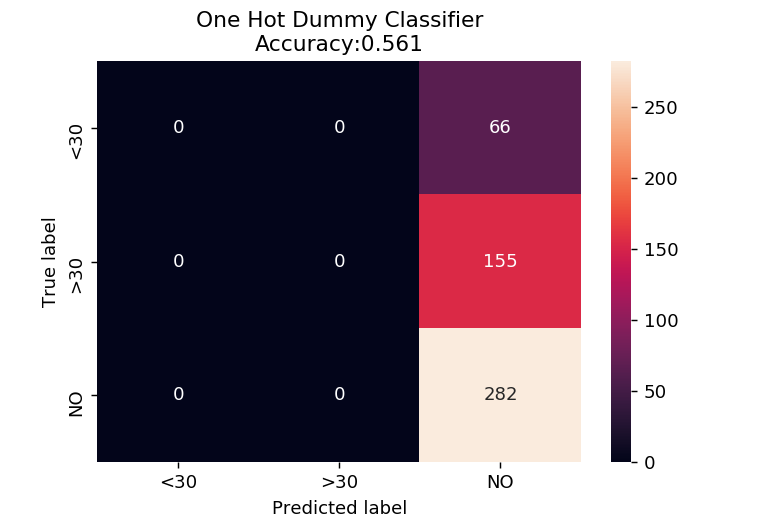

Micro-averaged precision = 0.56 (treat instances equally)
Macro-averaged precision = 0.19 (treat classes equally)
Micro-averaged f1 = 0.56 (treat instances equally)
Macro-averaged f1 = 0.24 (treat classes equally)
             precision    recall  f1-score   support

        <30       0.00      0.00      0.00        66
        >30       0.00      0.00      0.00       155
         NO       0.56      1.00      0.72       282

avg / total       0.31      0.56      0.40       503

CPU times: user 54.4 ms, sys: 8.19 ms, total: 62.6 ms
Wall time: 60.4 ms


/home/lam/anaconda2/envs/my_env3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lam/anaconda2/envs/my_env3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lam/anaconda2/envs/my_env3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [53]:
%%time
from sklearn.dummy import DummyClassifier

d_major = DummyClassifier(strategy='most_frequent').fit(X_train_hot, y_train)

print('train accuracy: {:.2f}'.format(d_major.score(X_train_hot, y_train)))
print('test accuracy: {:.2f}'.format(d_major.score(X_test_hot, y_test)))
plot_confusion(d_major, 'One Hot Dummy Classifier', X_test_hot, y_test)

[LibLinear]training accuracy: 0.84
test accuracy: 0.57


<IPython.core.display.Javascript object>


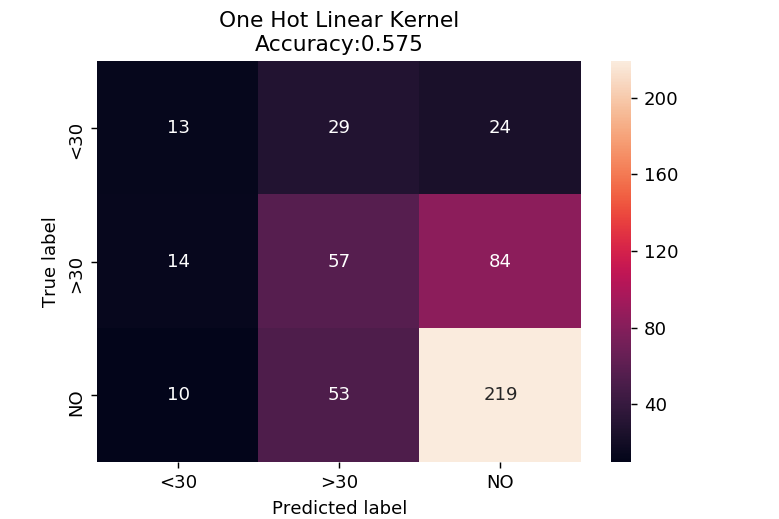

Micro-averaged precision = 0.57 (treat instances equally)
Macro-averaged precision = 0.48 (treat classes equally)
Micro-averaged f1 = 0.57 (treat instances equally)
Macro-averaged f1 = 0.45 (treat classes equally)
             precision    recall  f1-score   support

        <30       0.35      0.20      0.25        66
        >30       0.41      0.37      0.39       155
         NO       0.67      0.78      0.72       282

avg / total       0.55      0.57      0.56       503

CPU times: user 430 ms, sys: 0 ns, total: 430 ms
Wall time: 243 ms


In [54]:
%%time
clf = LinearSVC(verbose=True).fit(X_train_hot, y_train)

print('training accuracy: {:.2f}'.format(clf.score(X_train_hot, y_train)))
print('test accuracy: {:.2f}'.format(clf.score(X_test_hot, y_test)))
plot_confusion(clf, 'One Hot Linear Kernel', X_test_hot, y_test )

### <font color=orange>SVM optimise over accuracy</font>

In [55]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

clf = SVC() 

grid_values = [
  {'C': [0.1, 1, 10, 100, 1000], 'kernel':['linear', 'sigmoid']}, 
    {'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.001, 0.01, 0.05, 0.1, 1, 10, 100], 'kernel':['rbf']},
    {'C': [0.1, 1, 10, 100, 1000], 'degree':[2, 3, 4, 5], 'kernel': ['poly']}
 ]

grid_clf_acc = GridSearchCV(clf, param_grid = grid_values, n_jobs= 4 )
grid_clf_acc.fit(X_train_hot, y_train)
y_decision_fn_scores_acc = grid_clf_acc.decision_function(X_test_hot) 

print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)

Grid best parameter (max. accuracy):  {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Grid best score (accuracy):  0.6115537848605578
CPU times: user 6.43 s, sys: 94.7 ms, total: 6.52 s
Wall time: 3min 8s


In [56]:
pd.DataFrame(grid_clf_acc.cv_results_).sort_values(by=['mean_test_score'], ascending=False).iloc[:,2:8]

/home/lam/anaconda2/envs/my_env3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/lam/anaconda2/envs/my_env3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/lam/anaconda2/envs/my_env3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/ho

,mean_test_score,mean_train_score,param_C,param_degree,param_gamma,param_kernel
31,0.611554,0.729759,100,NaN,0.001,rbf
7,0.609562,0.670336,100,NaN,NaN,sigmoid
0,0.608234,0.659046,0.1,NaN,NaN,linear
25,0.608234,0.751008,10,NaN,0.01,rbf
20,0.599602,0.771581,1,NaN,0.1,rbf
19,0.590969,0.662036,1,NaN,0.05,rbf
61,0.577025,0.598948,1000,2,NaN,poly
26,0.576361,0.971113,10,NaN,0.05,rbf
2,0.574369,0.844292,1,NaN,NaN,linear
9,0.569721,0.848606,1000,NaN,NaN,sigmoid


<IPython.core.display.Javascript object>


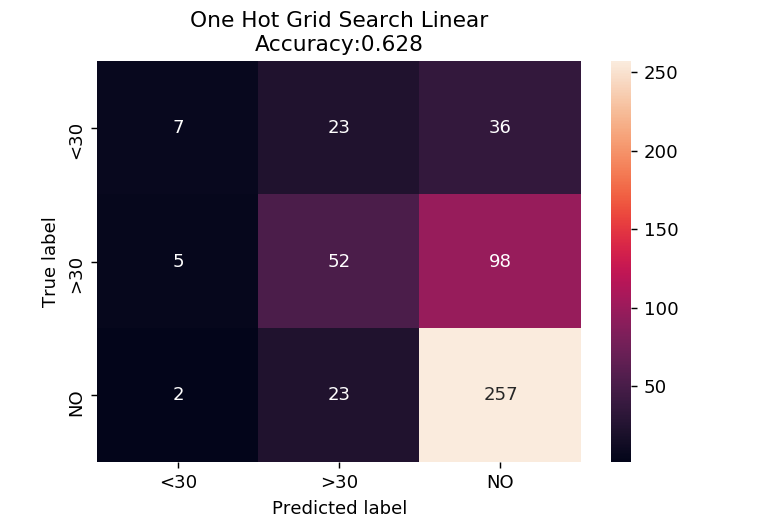

Micro-averaged precision = 0.63 (treat instances equally)
Macro-averaged precision = 0.56 (treat classes equally)
Micro-averaged f1 = 0.63 (treat instances equally)
Macro-averaged f1 = 0.45 (treat classes equally)
             precision    recall  f1-score   support

        <30       0.50      0.11      0.17        66
        >30       0.53      0.34      0.41       155
         NO       0.66      0.91      0.76       282

avg / total       0.60      0.63      0.58       503



In [57]:
plot_confusion(grid_clf_acc, 'One Hot Grid Search Linear', X_test_hot, y_test)